<center>
<h1>Data Sets Link</h1>

<a href="https://github.com/kianweelee/EDA--Hotel-Booking-dataset">GitHub Link Click And Download</a>
</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/hotel_bookings.csv")

In [3]:
df.shape

(119390, 32)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [8]:
df.nunique()


hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [9]:
df = df.drop_duplicates().sort_values('reservation_status_date').reset_index(drop = True)
df.shape

(87396, 32)

In [10]:
DimDt = df[['reservation_status_date', 'arrival_date_month']].drop_duplicates().sort_values('reservation_status_date').reset_index(drop = True)
DimDt.shape

(5077, 2)

In [11]:
DimDt['Day'] = DimDt['reservation_status_date'].apply(lambda x : x.day)
DimDt['Week'] = DimDt['reservation_status_date'].apply(lambda x : x.week)
DimDt['Month'] = DimDt['reservation_status_date'].apply(lambda x : x.month)
DimDt['Quarter'] = DimDt['reservation_status_date'].apply(lambda x : x.quarter)
DimDt['Year'] = DimDt['reservation_status_date'].apply(lambda x : x.year)

In [12]:
DimDt.head()

,reservation_status_date,arrival_date_month,Day,Week,Month,Quarter,Year
0,2014-10-17,September,17,42,10,4,2014
1,2014-10-17,July,17,42,10,4,2014
2,2014-10-17,August,17,42,10,4,2014
3,2014-11-18,September,18,47,11,4,2014
4,2015-01-01,December,1,1,1,1,2015


In [13]:
DimRw = DimDt.shape[0]
DimDt.insert(0, 'DateKey', range(1, 1 + DimRw))
DimDt.set_index('DateKey')
DimDt.head()

,DateKey,reservation_status_date,arrival_date_month,Day,Week,Month,Quarter,Year
0,1,2014-10-17,September,17,42,10,4,2014
1,2,2014-10-17,July,17,42,10,4,2014
2,3,2014-10-17,August,17,42,10,4,2014
3,4,2014-11-18,September,18,47,11,4,2014
4,5,2015-01-01,December,1,1,1,1,2015


In [14]:
DimST = df[['reservation_status_date', 'is_canceled', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'reservation_status', 'stays_in_weekend_nights', 'stays_in_week_nights' ]].drop_duplicates().sort_values('reservation_status_date').reset_index(drop = True)
DimST.shape

(22168, 9)

In [15]:
DimST.head()

,reservation_status_date,is_canceled,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,reservation_status,stays_in_weekend_nights,stays_in_week_nights
0,2014-10-17,1,1,1,0,0,Canceled,0,2
1,2014-10-17,1,1,21,0,0,Canceled,0,2
2,2014-10-17,1,1,2,0,0,Canceled,0,2
3,2014-11-18,1,0,0,0,0,Canceled,1,3
4,2015-01-01,1,0,0,0,0,Canceled,4,10


In [16]:
StRw = DimST.shape[0]
DimST.insert(0, 'StatusKey', range(1, 1 + StRw))
DimST.set_index('StatusKey')
DimST.head()

,StatusKey,reservation_status_date,is_canceled,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,reservation_status,stays_in_weekend_nights,stays_in_week_nights
0,1,2014-10-17,1,1,1,0,0,Canceled,0,2
1,2,2014-10-17,1,1,21,0,0,Canceled,0,2
2,3,2014-10-17,1,1,2,0,0,Canceled,0,2
3,4,2014-11-18,1,0,0,0,0,Canceled,1,3
4,5,2015-01-01,1,0,0,0,0,Canceled,4,10


In [17]:
DimHt = df[['reservation_status_date', 'hotel', 'country']].drop_duplicates().sort_values('reservation_status_date').reset_index(drop = True)
DimHt.shape

(22108, 3)

In [18]:
DimHt.head()

,reservation_status_date,hotel,country
0,2014-10-17,City Hotel,PRT
1,2014-11-18,Resort Hotel,PRT
2,2015-01-01,City Hotel,PRT
3,2015-01-01,Resort Hotel,PRT
4,2015-01-02,Resort Hotel,PRT


In [19]:
DimRwOr = DimHt.shape[0]
DimHt.insert(0, 'HotelKey', range(1, 1 + DimRwOr))
DimHt.set_index('HotelKey')
DimHt.head()

,HotelKey,reservation_status_date,hotel,country
0,1,2014-10-17,City Hotel,PRT
1,2,2014-11-18,Resort Hotel,PRT
2,3,2015-01-01,City Hotel,PRT
3,4,2015-01-01,Resort Hotel,PRT
4,5,2015-01-02,Resort Hotel,PRT


In [20]:
DimHt.to_csv('E:/Course/DataWareHousing/Final/Labs/DataSets/DW_Project/DimHt.csv', index=False)

In [21]:
DimHt.to_csv('E:/Course/DataWareHousing/Final/Labs/DataSets/DW_Project/DimST.csv', index=False)

In [22]:
DimDt.to_csv('E:/Course/DataWareHousing/Final/Labs/DataSets/DW_Project/DimDt.csv', index=False)

In [23]:
df_DimHt = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/DW_Project/DimHt.csv")
df_DimHt.head()

,HotelKey,reservation_status_date,hotel,country
0,1,2014-10-17,City Hotel,PRT
1,2,2014-11-18,Resort Hotel,PRT
2,3,2015-01-01,City Hotel,PRT
3,4,2015-01-01,Resort Hotel,PRT
4,5,2015-01-02,Resort Hotel,PRT


In [24]:
df_DimST = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/DW_Project/DimST.csv")
df_DimST.head()

,StatusKey,reservation_status_date,is_canceled,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,reservation_status,stays_in_weekend_nights,stays_in_week_nights
0,1,2014-10-17,1,1,1,0,0,Canceled,0,2
1,2,2014-10-17,1,1,21,0,0,Canceled,0,2
2,3,2014-10-17,1,1,2,0,0,Canceled,0,2
3,4,2014-11-18,1,0,0,0,0,Canceled,1,3
4,5,2015-01-01,1,0,0,0,0,Canceled,4,10


In [25]:
df_DimDt = pd.read_csv("E:/Course/DataWareHousing/Final/Labs/DataSets/DW_Project/DimDt.csv")
df_DimDt.head()

,DateKey,reservation_status_date,arrival_date_month,Day,Week,Month,Quarter,Year
0,1,2014-10-17,September,17,42,10,4,2014
1,2,2014-10-17,July,17,42,10,4,2014
2,3,2014-10-17,August,17,42,10,4,2014
3,4,2014-11-18,September,18,47,11,4,2014
4,5,2015-01-01,December,1,1,1,1,2015


In [43]:
hotel_count_contry = df_DimHt.groupby(["hotel","country"]).agg(TotalCount = ('hotel' , 'count')).reset_index()
hotel_count_contry.head(5000)
# hotel_count_contry = df_DimHt.groupby("hotel").agg(TotalCount = ('hotel' , 'count')).reset_index()
# hotel_count_contry.head(500)

,hotel,country,TotalCount
0,City Hotel,ABW,2
1,City Hotel,AGO,225
2,City Hotel,AIA,1
3,City Hotel,ALB,7
4,City Hotel,AND,2
...,...,...,...
286,Resort Hotel,VEN,3
287,Resort Hotel,VNM,2
288,Resort Hotel,ZAF,17
289,Resort Hotel,ZMB,1


<BarContainer object of 291 artists>

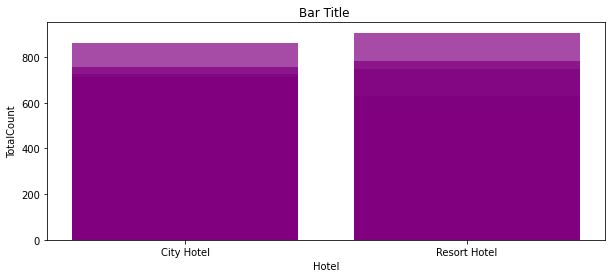

In [44]:
plt.figure(figsize=(10,4))
plt.title("Bar Title ")
plt.xlabel("Hotel")
plt.ylabel("TotalCount")
plt.bar(hotel_count_contry.hotel , hotel_count_contry.TotalCount ,color='purple',alpha=0.7)


In [42]:
hot_Sta = pd.merge(df_DimHt,df_DimST,on='reservation_status_date')
hot_Sta.head()

,HotelKey,reservation_status_date,hotel,country,StatusKey,is_canceled,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,reservation_status,stays_in_weekend_nights,stays_in_week_nights
0,1,2014-10-17,City Hotel,PRT,1,1,1,1,0,0,Canceled,0,2
1,1,2014-10-17,City Hotel,PRT,2,1,1,21,0,0,Canceled,0,2
2,1,2014-10-17,City Hotel,PRT,3,1,1,2,0,0,Canceled,0,2
3,2,2014-11-18,Resort Hotel,PRT,4,1,0,0,0,0,Canceled,1,3
4,3,2015-01-01,City Hotel,PRT,5,1,0,0,0,0,Canceled,4,10


In [45]:
hotel_count_contry = hot_Sta.groupby(["hotel","country"]).agg(TotalCount_stays_in_weekend_nights = ('stays_in_weekend_nights' , 'sum'),TotalCount_stays_in_week_nights = ('stays_in_week_nights' , 'sum')).reset_index()
hotel_count_contry.head(5000)

,hotel,country,TotalCount_stays_in_weekend_nights,TotalCount_stays_in_week_nights
0,City Hotel,ABW,78,207
1,City Hotel,AGO,8542,21824
2,City Hotel,AIA,45,70
3,City Hotel,ALB,215,621
4,City Hotel,AND,61,188
...,...,...,...,...
286,Resort Hotel,VEN,81,253
287,Resort Hotel,VNM,53,154
288,Resort Hotel,ZAF,593,1497
289,Resort Hotel,ZMB,23,70


<BarContainer object of 291 artists>

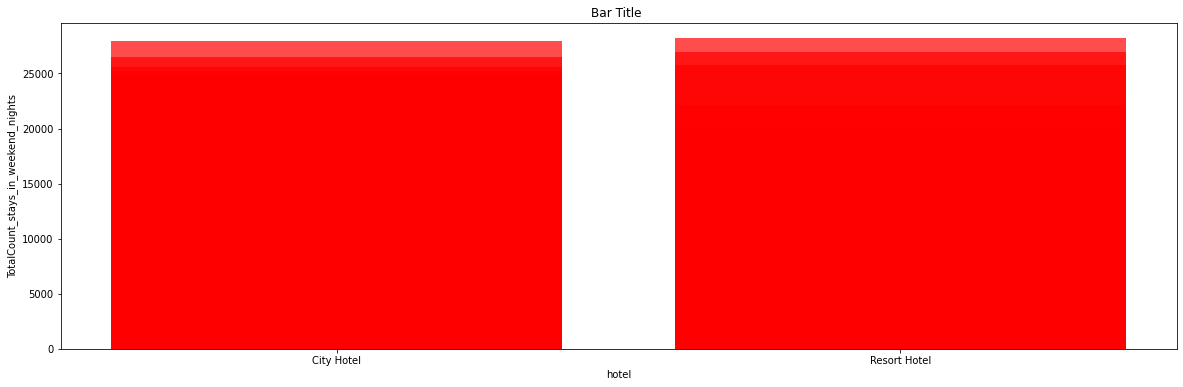

In [54]:
plt.figure(figsize=(20,6))
plt.title("Bar Title ")
plt.xlabel("hotel")
plt.ylabel("TotalCount_stays_in_weekend_nights")
plt.bar(hotel_count_contry.hotel , hotel_count_contry.TotalCount_stays_in_weekend_nights ,color='red',alpha=0.7)


<BarContainer object of 291 artists>

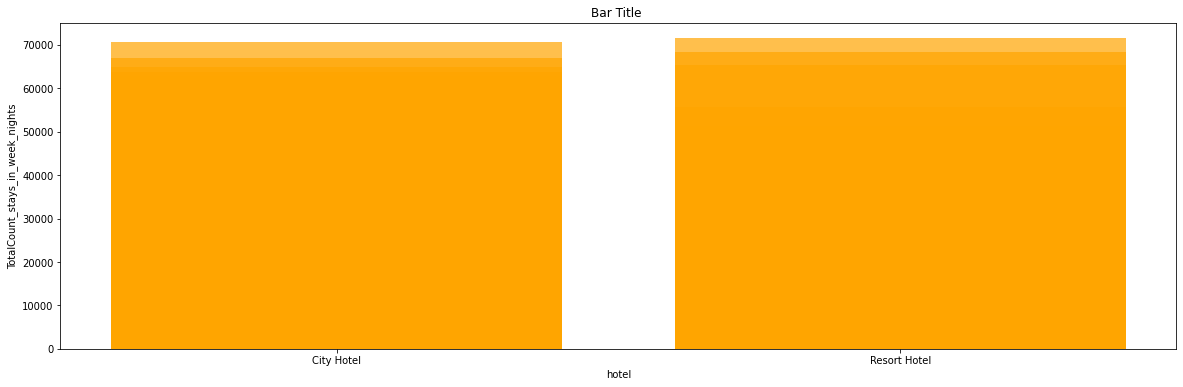

In [62]:
plt.figure(figsize=(20,6))
plt.title("Bar Title ")
plt.xlabel("hotel")
plt.ylabel("TotalCount_stays_in_week_nights")
plt.bar(hotel_count_contry.hotel , hotel_count_contry.TotalCount_stays_in_week_nights ,color='orange',alpha=0.7)